In [1]:
#skip
from fastai.tabular.all import *
from transfertab.utils import *
from transfertab.transfer import *
from transfertab.extract import *
from fastcore.xtras import *
from fastai.learner import *
import numpy as np
from fastai.interpret import *
import sklearn.metrics as skm

In [2]:
#skip
import wandb
from fastai.callback.wandb import *

In [3]:
#skip
dfA = pd.read_csv("../data/census-income.csv")
dfB = pd.read_csv('../data/adult.csv')

In [4]:
#skip
wandb.init(
    project='transfertab', 
    save_code=True, 
    group='Exp1c', 
    job_type='basetrain', 
    tags=['base', 'census'], 
    name='modelA training',
    notes="Training modelA from which we'll take embeddings",
    reinit=True
)

In [5]:
#skip
emb_szs = (
  (10, 6),
  (18, 8),
  (4, 3),
  (8, 5),
  (25, 10),
  (16, 8),
  (6, 4),
  (11, 6),
  (3, 3),
  (4, 3),
  (7, 5),
  (9, 5),
  (7, 5),
  (7, 5),
  (52, 15),
  (39, 12),
  (9, 5),
  (11, 6),
  (10, 6),
  (11, 6),
  (4, 3),
  (5, 4),
  (6, 4),
  (44, 13),
  (44, 13),
  (44, 13),
  (6, 4),
  (4, 3),
)

new_modelA = TabularModel(emb_szs, 0, 2, [200, 100])
load_model('./models/model.pth', new_modelA, "test", with_opt=False)

In [6]:
#skip
splitsA = RandomSplitter(valid_pct=0.2)(range_of(dfA))
toA = TabularPandas(dfA, procs=[Categorify, FillMissing,Normalize],
                   cat_names = ["class of worker", "education", "enroll in edu inst last wk", "marital stat", "major industry code", "major occupation code", "race", "hispanic origin", "sex", "member of a labor union", "reason for unemployment", "full or part time employment stat", "tax filer stat", "region of previous residence", "state of previous residence", "detailed household and family stat", "detailed household summary in household", "migration code-change in msa", "migration code-change in reg", "migration code-move within reg", "live in this house 1 year ago", "migration prev res in sunbelt", "family members under 18", "country of birth father", "country of birth mother", "country of birth self", "citizenship", "fill inc questionnaire for veteran's admin"],
                   y_names='salary',
                   splits=splitsA)
dlsA = toA.dataloaders(bs=128)
learnA = tabular_learner(dlsA, metrics=accuracy)

In [7]:
learnA.lr_find()

SuggestedLRs(lr_min=0.05248074531555176, lr_steep=0.05754399299621582)

In [8]:
learnA.lr_find??

In [9]:
learnA.lr_find()

SuggestedLRs(lr_min=0.05248074531555176, lr_steep=0.03981071710586548)

In [10]:
learnA.fit_one_cycle??

In [11]:
#skip
cbs=[WandbCallback(log="all", dataset_name="census-income", n_preds=128, seed=1), SaveModelCallback()]
learnA.fit_one_cycle(10, cbs=cbs, lr_max=0.03)

In [12]:
#skip
learnA.recorder.plot_loss()

In [13]:
#skip
torch.save(learnA.model.state_dict(),"../results/exp1c/modelA_state_dict")

In [14]:
#skip
torch.save(learnA.model.state_dict(),"../results/exp1c/modelA_state_dict")

In [15]:
#skip
learnA.model.embeds

ModuleList(
  (0): Embedding(10, 6)
  (1): Embedding(18, 8)
  (2): Embedding(4, 3)
  (3): Embedding(8, 5)
  (4): Embedding(25, 10)
  (5): Embedding(16, 8)
  (6): Embedding(6, 4)
  (7): Embedding(11, 6)
  (8): Embedding(3, 3)
  (9): Embedding(4, 3)
  (10): Embedding(7, 5)
  (11): Embedding(9, 5)
  (12): Embedding(7, 5)
  (13): Embedding(7, 5)
  (14): Embedding(52, 15)
  (15): Embedding(39, 12)
  (16): Embedding(9, 5)
  (17): Embedding(11, 6)
  (18): Embedding(10, 6)
  (19): Embedding(11, 6)
  (20): Embedding(4, 3)
  (21): Embedding(5, 4)
  (22): Embedding(6, 4)
  (23): Embedding(44, 13)
  (24): Embedding(44, 13)
  (25): Embedding(44, 13)
  (26): Embedding(6, 4)
  (27): Embedding(4, 3)
)

In [16]:
#skip
learnA.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(10, 6)
    (1): Embedding(18, 8)
    (2): Embedding(4, 3)
    (3): Embedding(8, 5)
    (4): Embedding(25, 10)
    (5): Embedding(16, 8)
    (6): Embedding(6, 4)
    (7): Embedding(11, 6)
    (8): Embedding(3, 3)
    (9): Embedding(4, 3)
    (10): Embedding(7, 5)
    (11): Embedding(9, 5)
    (12): Embedding(7, 5)
    (13): Embedding(7, 5)
    (14): Embedding(52, 15)
    (15): Embedding(39, 12)
    (16): Embedding(9, 5)
    (17): Embedding(11, 6)
    (18): Embedding(10, 6)
    (19): Embedding(11, 6)
    (20): Embedding(4, 3)
    (21): Embedding(5, 4)
    (22): Embedding(6, 4)
    (23): Embedding(44, 13)
    (24): Embedding(44, 13)
    (25): Embedding(44, 13)
    (26): Embedding(6, 4)
    (27): Embedding(4, 3)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): Linear(in_features=183, out_fe

In [17]:
#skip
learnA.embeds[-1].weight

Parameter containing:
tensor([[-1.9202e-04, -7.4663e-04,  2.1195e-03],
        [-1.9953e+00, -2.3478e+00, -1.8593e+00],
        [-8.4477e-03, -2.3337e-01,  4.4425e-03],
        [ 1.5410e+00,  1.3829e+00,  1.4453e+00]], requires_grad=True)

In [18]:
learnA.dls.cat_names

(#28) ['class of worker','education','enroll in edu inst last wk','marital stat','major industry code','major occupation code','race','hispanic origin','sex','member of a labor union'...]

In [19]:
#skip
catcolsA = ["class of worker", "education", "enroll in edu inst last wk", "marital stat", "major industry code", "major occupation code", "race", "hispanic origin", "sex", "member of a labor union", "reason for unemployment", "full or part time employment stat", "tax filer stat", "region of previous residence", "state of previous residence", "detailed household and family stat", "detailed household summary in household", "migration code-change in msa", "migration code-change in reg", "migration code-move within reg", "live in this house 1 year ago", "migration prev res in sunbelt", "family members under 18", "country of birth father", "country of birth mother", "country of birth self", "citizenship", "fill inc questionnaire for veteran's admin"]
catdictA = {col:list(learnA.dls.categorify.classes[col]) for col in catcolsA}
extractembeds(learnA.model, catdictA, transfercats=catcolsA, allcats=catcolsA, path="../results/exp1c/learnA_extracts", kind="bson");

In [20]:
wandb.finish()

In [21]:
# \([0-9]*\): Embedding

In [22]:
#skip
emb_szs = (
  (10, 6),
  (18, 8),
  (4, 3),
  (8, 5),
  (25, 10),
  (16, 8),
  (6, 4),
  (11, 6),
  (3, 3),
  (4, 3),
  (7, 5),
  (9, 5),
  (7, 5),
  (7, 5),
  (52, 15),
  (39, 12),
  (9, 5),
  (11, 6),
  (10, 6),
  (11, 6),
  (4, 3),
  (5, 4),
  (6, 4),
  (44, 13),
  (44, 13),
  (44, 13),
  (6, 4),
  (4, 3),
)

new_modelA = TabularModel(emb_szs, 0, 2, [200, 100])
# load_model('./models/model.pth', new_modelA, "test", with_opt=False)
new_modelA.load_state_dict(torch.load("../results/exp1c/modelA_state_dict"))

<All keys matched successfully>

In [23]:
#skip
new_modelA.embeds[-1].weight

Parameter containing:
tensor([[-1.9202e-04, -7.4663e-04,  2.1195e-03],
        [-1.9953e+00, -2.3478e+00, -1.8593e+00],
        [-8.4477e-03, -2.3337e-01,  4.4425e-03],
        [ 1.5410e+00,  1.3829e+00,  1.4453e+00]], requires_grad=True)

In [24]:
#skip
splitsB = RandomSplitter(valid_pct=0.2)(range_of(dfB))
toB = TabularPandas(dfB, procs=[Categorify, FillMissing, Normalize],
                   cat_names = [' workclass', ' education', ' marital_status', ' occupation', ' relationship', ' race'],
                   cont_names = ['age', ' fnlwgt', ' education_num'],
                   y_names=' salary',
                   splits=splitsB)
dlsB = toB.dataloaders(bs=256)

In [25]:
#skip
learnB = tabular_learner(dlsB, metrics=accuracy, emb_szs={' relationship':12})

In [26]:
#skip
metadict_path = Path("../data/jsons/metadict_adult2census.json")
with open(metadict_path, 'r') as j:
     metadict = json.loads(j.read())
metadict;

In [27]:
#skip
learnB.model.embeds[-1].weight

Parameter containing:
tensor([[ 0.0142,  0.0100, -0.0143,  0.0073],
        [ 0.0105, -0.0045,  0.0026,  0.0020],
        [-0.0028,  0.0115,  0.0002,  0.0129],
        [ 0.0120, -0.0116,  0.0012, -0.0033],
        [-0.0150, -0.0100, -0.0086,  0.0017],
        [-0.0008, -0.0050,  0.0059,  0.0041]], requires_grad=True)

In [28]:
#skip
catdictB = {col:list(learnB.dls.categorify.classes[col]) for col in catcolsB}

In [29]:
#skip
transfer_cats = (" workclass", " marital_status", " race", " relationship", " education")
catcolsB = tuple(learnB.dls.cat_names)
catdictB = {col:list(learnB.dls.categorify.classes[col]) for col in catcolsB}
transferembeds_(
    learnB.model.embeds, 
    learnA.model.embeds, 
    metadict, 
    transfer_cats, 
    newcatcols=catcolsB, 
    oldcatcols=catcolsA, 
    oldcatdict=catdictA, 
    newcatdict=catdictB)

In [30]:
#skip
learnA.model.embeds[catcolsA.index('education')].weight

Parameter containing:
tensor([[ 1.4507e-03, -1.7816e-03, -4.5182e-04, -1.8841e-03,  1.6511e-04,
         -1.6063e-03,  1.3733e-03, -5.6074e-04],
        [ 1.7646e+00,  1.7548e+00,  1.6959e+00, -2.1733e+00, -2.5880e+00,
         -1.7598e+00,  1.7281e+00,  1.7162e+00],
        [ 1.5070e+00,  1.4987e+00,  1.4411e+00, -2.1786e+00, -1.8106e+00,
         -1.5247e+00,  1.4846e+00,  1.4793e+00],
        [ 1.6657e+00,  1.6711e+00,  1.6818e+00, -1.7459e-01, -7.3531e-01,
         -1.5861e+00,  1.6702e+00,  1.6637e+00],
        [ 1.5446e+00,  1.5431e+00,  1.5408e+00, -1.1856e+00, -1.1008e+00,
         -1.4705e+00,  1.5405e+00,  1.5294e+00],
        [ 2.0376e+00,  2.0200e+00,  2.0244e+00, -1.8346e+00, -1.9308e+00,
         -1.9511e+00,  2.0175e+00,  2.0018e+00],
        [ 1.8135e+00,  1.8132e+00,  1.7658e+00, -1.0531e+00, -1.2896e+00,
         -1.7748e+00,  1.7824e+00,  1.7780e+00],
        [ 1.7921e+00,  1.7714e+00,  1.7686e+00, -2.0866e+00, -2.0459e+00,
         -1.7134e+00,  1.7691e+00,  1.7557e

In [31]:
#skip
learnB.model.embeds[catcolsB.index(' education')].weight

Parameter containing:
tensor([[ 1.4507e-03, -1.7816e-03, -4.5182e-04, -1.8841e-03,  1.6511e-04,
         -1.6063e-03,  1.3733e-03, -5.6074e-04],
        [ 1.7646e+00,  1.7548e+00,  1.6959e+00, -2.1733e+00, -2.5880e+00,
         -1.7598e+00,  1.7281e+00,  1.7162e+00],
        [ 1.5070e+00,  1.4987e+00,  1.4411e+00, -2.1786e+00, -1.8106e+00,
         -1.5247e+00,  1.4846e+00,  1.4793e+00],
        [ 1.6657e+00,  1.6711e+00,  1.6818e+00, -1.7459e-01, -7.3531e-01,
         -1.5861e+00,  1.6702e+00,  1.6637e+00],
        [ 1.4789e-01,  1.5248e-01,  1.8233e-01, -4.0595e-02,  2.1710e-01,
         -1.1232e-01,  1.6193e-01,  1.5807e-01],
        [ 3.9440e-01,  3.9093e-01,  4.2413e-01, -3.6511e-01, -1.9788e-01,
         -3.5262e-01,  4.0046e-01,  3.9422e-01],
        [ 1.8135e+00,  1.8132e+00,  1.7658e+00, -1.0531e+00, -1.2896e+00,
         -1.7748e+00,  1.7824e+00,  1.7780e+00],
        [ 1.7921e+00,  1.7714e+00,  1.7686e+00, -2.0866e+00, -2.0459e+00,
         -1.7134e+00,  1.7691e+00,  1.7557e

In [32]:
#skip
dlsC = deepcopy(dlsB)
learnC = tabular_learner(dlsC, metrics=accuracy)

In [33]:
learnC.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(10, 6)
    (1): Embedding(17, 8)
    (2): Embedding(8, 5)
    (3): Embedding(16, 8)
    (4): Embedding(7, 5)
    (5): Embedding(6, 4)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): Linear(in_features=39, out_features=200, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): LinBnDrop(
      (0): Linear(in_features=200, out_features=100, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): LinBnDrop(
      (0): Linear(in_features=100, out_features=2, bias=True)
    )
  )
)

In [34]:
learnC.model.layers

Sequential(
  (0): LinBnDrop(
    (0): Linear(in_features=39, out_features=200, bias=False)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): LinBnDrop(
    (0): Linear(in_features=200, out_features=100, bias=False)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (2): LinBnDrop(
    (0): Linear(in_features=100, out_features=2, bias=True)
  )
)

In [35]:
learnC.model.layers.weights

In [36]:
learnC.model.layers

Sequential(
  (0): LinBnDrop(
    (0): Linear(in_features=39, out_features=200, bias=False)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): LinBnDrop(
    (0): Linear(in_features=200, out_features=100, bias=False)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (2): LinBnDrop(
    (0): Linear(in_features=100, out_features=2, bias=True)
  )
)

In [37]:
learnC.model.layers[0][0]

Linear(in_features=39, out_features=200, bias=False)

In [38]:
learnC.model.layers[0][0].weight

Parameter containing:
tensor([[-0.0137, -0.0767, -0.1099,  ...,  0.1246,  0.0065,  0.1550],
        [ 0.0527,  0.1010, -0.0418,  ...,  0.0505, -0.1310, -0.0923],
        [ 0.0301,  0.0071,  0.0141,  ...,  0.0648, -0.0432,  0.0909],
        ...,
        [ 0.0694, -0.1019,  0.0997,  ..., -0.1458,  0.0882,  0.0786],
        [ 0.0206,  0.0173,  0.0988,  ...,  0.1101, -0.0988, -0.0041],
        [-0.1585,  0.1070, -0.0474,  ...,  0.0050, -0.0307,  0.0776]],
       requires_grad=True)

In [39]:
learnC.model.layers.load_state_dict(learnB.model.layers.state_dict())

In [40]:
#skip
dlsC = deepcopy(dlsB)
learnC = tabular_learner(dlsC, metrics=accuracy, emb_szs={' relationship':12})

In [41]:
learnC.model.layers[0][0].weight

Parameter containing:
tensor([[ 0.0798,  0.1092,  0.1147,  ..., -0.1457, -0.1431, -0.0635],
        [ 0.0111,  0.0763, -0.1410,  ..., -0.0793, -0.1313,  0.0582],
        [-0.1117, -0.0091, -0.0304,  ...,  0.0183, -0.1071, -0.0097],
        ...,
        [ 0.1164,  0.0079,  0.1130,  ..., -0.1389, -0.0168,  0.0638],
        [-0.1048, -0.1406, -0.1218,  ...,  0.1319, -0.0497, -0.1214],
        [ 0.0215, -0.0821, -0.0383,  ...,  0.0348,  0.1008,  0.0184]],
       requires_grad=True)

In [42]:
learnC.model.layers.load_state_dict(learnB.model.layers.state_dict())

<All keys matched successfully>

In [43]:
learnC.model.layers[0][0].weight

Parameter containing:
tensor([[-0.1073, -0.0332, -0.0962,  ...,  0.1260,  0.0125, -0.0106],
        [ 0.1438,  0.1016,  0.0015,  ..., -0.0944,  0.0115, -0.0234],
        [-0.0704,  0.0832, -0.0904,  ...,  0.1074, -0.0750, -0.0512],
        ...,
        [ 0.0042,  0.1228,  0.0002,  ...,  0.0861, -0.0895, -0.1421],
        [-0.0238,  0.0789, -0.0702,  ..., -0.0716, -0.0874, -0.0290],
        [-0.0146, -0.0887,  0.0006,  ...,  0.0554, -0.0540, -0.0881]],
       requires_grad=True)

In [44]:
learnB.model.layers[0][0].weight

Parameter containing:
tensor([[-0.1073, -0.0332, -0.0962,  ...,  0.1260,  0.0125, -0.0106],
        [ 0.1438,  0.1016,  0.0015,  ..., -0.0944,  0.0115, -0.0234],
        [-0.0704,  0.0832, -0.0904,  ...,  0.1074, -0.0750, -0.0512],
        ...,
        [ 0.0042,  0.1228,  0.0002,  ...,  0.0861, -0.0895, -0.1421],
        [-0.0238,  0.0789, -0.0702,  ..., -0.0716, -0.0874, -0.0290],
        [-0.0146, -0.0887,  0.0006,  ...,  0.0554, -0.0540, -0.0881]],
       requires_grad=True)

In [45]:
#skip
intepret_learnB=ClassificationInterpretation.from_learner(learnB)

In [46]:
#skip
intepret_learnB.print_classification_report()

In [47]:
#skip
dB,tB = flatten_check(intepret_learnB.decoded, intepret_learnB.targs)
reportB=skm.classification_report(tB, dB, labels=list(intepret_learnB.vocab.o2i.values()), target_names=[str(v) for v in intepret_learnB.vocab],output_dict=True)

In [48]:
#skip
intepret_learnB_report = pd.DataFrame(reportB).transpose()

In [49]:
#skip
intepret_learnB_report.to_csv("../results/exp1c/Step6-Validation-ModelB")

In [50]:
#skip
intepret_learnC = ClassificationInterpretation.from_learner(learnC)
dC,tC = flatten_check(intepret_learnC.decoded, intepret_learnC.targs)
reportC=skm.classification_report(tC, dC, labels=list(intepret_learnC.vocab.o2i.values()), target_names=[str(v) for v in intepret_learnC.vocab],output_dict=True)
intepret_learnC_report = pd.DataFrame(reportC).transpose()
intepret_learnC_report.to_csv("../results/exp1c/Step6-Validation-ModelC")

In [51]:
#skip
intepret_learnC.print_classification_report()

In [52]:
#skip
wandb.init(
    project='transfertab', 
    save_code=True, 
    group='Exp1c', 
    job_type='finetune', 
    tags=['transfer', 'adult'], 
    name='modelB training',
    notes='Training modelB which contains transferred embeddings for " workclass", " marital_status", " race", " relationship", " education"',
    reinit=True
)

In [53]:
#skip
learnB.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(10, 6)
    (1): Embedding(17, 8)
    (2): Embedding(8, 5)
    (3): Embedding(16, 8)
    (4): Embedding(7, 12)
    (5): Embedding(6, 4)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): Linear(in_features=46, out_features=200, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): LinBnDrop(
      (0): Linear(in_features=200, out_features=100, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): LinBnDrop(
      (0): Linear(in_features=100, out_features=2, bias=True)
    )
  )
)

In [54]:
#skip
for i in range(len(catcolsB)):
    learnB.model.embeds[i].weight.requires_grad = False
learnB.create_opt()

In [55]:
#skip
learnB.embeds[5].weight

Parameter containing:
tensor([[ 1.3111e-03, -9.3459e-04,  8.4980e-04, -1.5825e-03],
        [-7.1275e-01,  1.1130e+00, -2.1454e+00,  2.2315e+00],
        [ 2.6314e-01, -7.9928e-02,  5.1556e-01, -4.6700e-01],
        [-1.4039e+00, -6.0671e-01, -1.3691e+00,  1.1184e+00],
        [ 7.3182e-01,  7.3646e-01,  7.2689e-01, -5.0618e-01],
        [ 1.7532e-01, -1.0889e-01,  6.3369e-01, -5.4034e-01]])

In [56]:
#skip
learnB.layers[0][0].weight

Parameter containing:
tensor([[-0.1073, -0.0332, -0.0962,  ...,  0.1260,  0.0125, -0.0106],
        [ 0.1438,  0.1016,  0.0015,  ..., -0.0944,  0.0115, -0.0234],
        [-0.0704,  0.0832, -0.0904,  ...,  0.1074, -0.0750, -0.0512],
        ...,
        [ 0.0042,  0.1228,  0.0002,  ...,  0.0861, -0.0895, -0.1421],
        [-0.0238,  0.0789, -0.0702,  ..., -0.0716, -0.0874, -0.0290],
        [-0.0146, -0.0887,  0.0006,  ...,  0.0554, -0.0540, -0.0881]],
       requires_grad=True)

In [57]:
#skip
cbsB=[WandbCallback(log="all", dataset_name="adult", n_preds=128, seed=1), SaveModelCallback()]
learnB.fit_one_cycle(1, cbs=cbsB)

In [58]:
#skip
for i in range(len(catcolsB)):
    learnB.model.embeds[i].weight.requires_grad = True
learnB.create_opt()

In [59]:
#skip
learnB.embeds[-1].weight

Parameter containing:
tensor([[ 1.3111e-03, -9.3459e-04,  8.4980e-04, -1.5825e-03],
        [-7.1275e-01,  1.1130e+00, -2.1454e+00,  2.2315e+00],
        [ 2.6314e-01, -7.9928e-02,  5.1556e-01, -4.6700e-01],
        [-1.4039e+00, -6.0671e-01, -1.3691e+00,  1.1184e+00],
        [ 7.3182e-01,  7.3646e-01,  7.2689e-01, -5.0618e-01],
        [ 1.7532e-01, -1.0889e-01,  6.3369e-01, -5.4034e-01]],
       requires_grad=True)

In [60]:
#skip
learnB.fit_one_cycle(2, cbs=cbsB)

In [61]:
#skip
learnB.embeds[-1].weight

Parameter containing:
tensor([[ 1.3098e-03, -9.3364e-04,  8.4893e-04, -1.5809e-03],
        [-7.1622e-01,  1.1078e+00, -2.1406e+00,  2.2308e+00],
        [ 2.8853e-01, -6.7370e-02,  5.1037e-01, -4.7139e-01],
        [-1.3851e+00, -6.0213e-01, -1.3638e+00,  1.1054e+00],
        [ 7.4105e-01,  7.5797e-01,  7.2147e-01, -5.0683e-01],
        [ 1.6434e-01, -1.1286e-01,  6.3651e-01, -5.3046e-01]],
       requires_grad=True)

In [62]:
#skip
learnB.recorder.plot_loss()

In [63]:
#skip
learnB.fit_one_cycle(1, cbs=cbsB)

In [64]:
#skip
learnB.embeds[-1].weight

Parameter containing:
tensor([[ 1.3091e-03, -9.3316e-04,  8.4850e-04, -1.5801e-03],
        [-7.2138e-01,  1.1078e+00, -2.1380e+00,  2.2279e+00],
        [ 2.9455e-01, -5.7048e-02,  5.1236e-01, -4.7272e-01],
        [-1.3826e+00, -5.9556e-01, -1.3616e+00,  1.1046e+00],
        [ 7.4840e-01,  7.7091e-01,  7.2122e-01, -5.0608e-01],
        [ 1.6296e-01, -1.1749e-01,  6.3543e-01, -5.2904e-01]],
       requires_grad=True)

In [65]:
#skip
learnB.recorder.plot_loss()

In [66]:
#skip
wandb.finish()

In [67]:
#skip
wandb.init(
    project='transfertab', 
    save_code=True, 
    group='Exp1c', 
    job_type='controlgrp', 
    tags=['base', 'adult'], 
    name='modelC training',
    notes='Training modelC which contains randomly initialized weights and same classifier weights as modelB',
    reinit=True
)

In [68]:
#skip
cbsC=[WandbCallback(log="all", dataset_name="adult", n_preds=128, seed=1), SaveModelCallback()]
learnC.fit_one_cycle(4, cbs=cbsC)

epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08
3,0.347912,0.355953,0.833538,00:07


In [69]:
#skip
learnC.recorder.plot_loss()

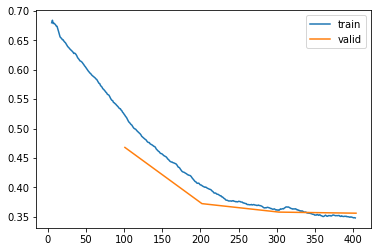

In [70]:
#skip
wandb.finish()